# Makeover Monday | 2026 W7 Living Planet Index
The data for this weeks Makeover Monday came from the [Living Planet Report 2024](https://livingplanet.panda.org/en-GB/), most specficially the **Global Living Planet Index (LPI)** which is the main indicator derived from thier data and reporting.
*"The LPI is a measure of the state of the world's biological diversity based on population trends of vertebrate species from terrestrial, freshwater and marine habitats."*
The data was compiled by the [Makeover Monday](www.makeovermonday.co.uk) team from the [Living Planet Index](https://www.livingplanetindex.org/latest_results) results website.

**About the Index**

*"The index represents 34,836 populations of 5,495 species. All indices are weighted by species richness, giving species-rich taxonomic groups in terrestrial, marine and freshwater systems more weight
than groups with fewer species. Index values are smoothed using a 3-year running average but keeping the first and final index values fixed."*
    - **Living Plant Index, 1970 to 2020**

* **Report Link**: https://livingplanet.panda.org/en-GB/
* **Living Planet Index**: https://www.livingplanetindex.org/latest_results
* **Compiled Data** *(published by Makeover Monday)*: https://data.world/makeovermonday/2026w7-living-planet-index

In [1]:
import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('https://query.data.world/s/jvwoz3dttlgk3uyzsi3r5cmxxpdoc7?dws=00000')

# Exploratory Data Analysis

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,459,9,Global,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,459.0,NaN,NaN,NaN,1995.0,14.735662,1970.0,1982.0,1995.0,2008.0,2020.0
LPI_final,459.0,NaN,NaN,NaN,0.628564,0.288111,0.053773,0.414724,0.632567,0.873424,1.282238
CI_low,459.0,NaN,NaN,NaN,0.51471,0.28185,0.02833,0.275981,0.489877,0.735362,1.106027
CI_high,459.0,NaN,NaN,NaN,0.786857,0.304549,0.095174,0.549141,0.845923,1.025169,1.479431


In [4]:
df.dtypes

,0
Category,object
Year,int64
LPI_final,float64
CI_low,float64
CI_high,float64


In [5]:
df.isnull().sum()

,0
Category,0
Year,0
LPI_final,0
CI_low,0
CI_high,0


In [8]:
df['Category'].unique()

array(['Global', 'Terrestrial', 'Marine', 'Freshwater', 'Africa',
       'Asia & Pacific', 'Europe & Central Asia',
       'Latin Amercia & Caribbean', 'North America'], dtype=object)

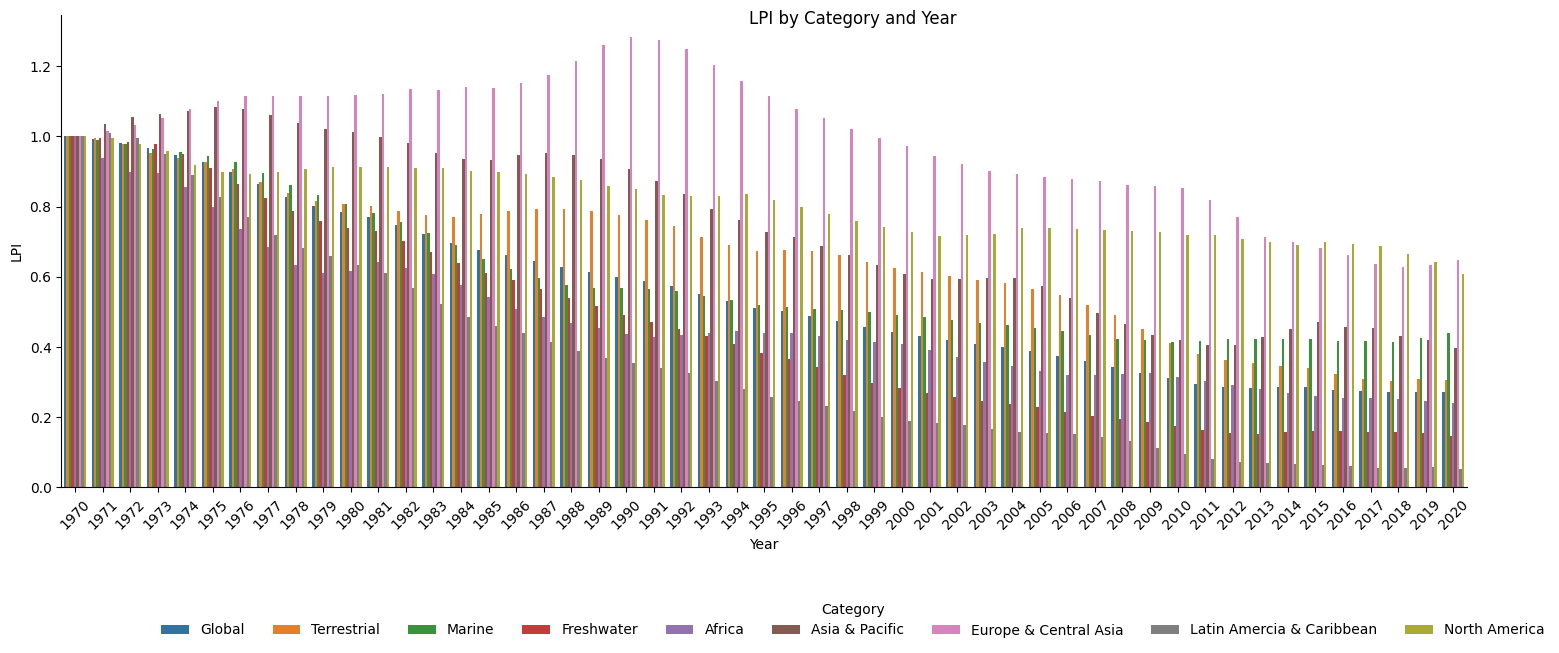

In [32]:
g = sns.catplot(
    data=df,
    x = "Year",
    y = "LPI_final",
    hue = "Category",
    kind = "bar",
    height = 5,
    aspect = 3
)

g.set_axis_labels("Year","LPI")
g.fig.suptitle("LPI by Category and Year")
g.set_xticklabels(rotation=45)

sns.move_legend(
    g,
    "lower center", # location inside the figure
    bbox_to_anchor=(.5, -0.3), # coordinates for the legend box (0.5 is center x, 0.05 is bottom y)
    ncol=9,  # number of columns for a horizontal legend
    title="Category",
    frameon=False, # optional to remove the legend frame
)

g.fig.subplots_adjust(bottom=0.025) # need this for the legend at the bottom
plt.show()

# Plan for my Viz
This a "rate of change" from anchor chart... where the starting point is year 1970 (see that flat line at the beggining of the chart above), so I think what I will do is a simple Horizonal Forest Plot (time along the horizonal axis) and LPI, and Confidence Intervale to show the range) accompanied by a bubble chart with LPI on the size along time which the users will interact with. No additional data processing is needed, I will just pull this straight into Tableau via BigQuery / Connected Sheets.

In [33]:
#convert the df to target table in bigquery dataet
UPLOAD_TO_BQ = False # set True when you actually want to write tables

if UPLOAD_TO_BQ:
  project_id = 'your_project_id'
  destination_table = 'your_dataset.another_new_table'

  pandas_gbq.to_gbq(
      dataframe=df,
      destination_table=destination_table,
      project_id=project_id,
      if_exists='replace' ## 'if_exists' options: 'fail', 'replace', 'append'
  )

100%|██████████| 1/1 [00:00<00:00, 6223.00it/s]


# Tableau Dashboard